In [8]:
from dataloader import DatasetLoader
from network import Net
from test import evaluate
from train import train
from config import cfg
import torch
from utils import plot_loss
from utils import plot_accuracy

In [9]:
dataset = DatasetLoader()
dataset.transform_load()

Loaded 569 images under train
Loaded 71 images under val
Loaded 72 images under test
Classes: 
['anomaly', 'normal']
Classes = 0, counts 32
Classes = 1, counts 537


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


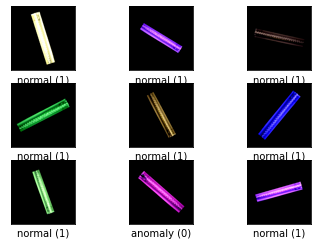

In [10]:
dataset.display_samples(dataset.TRAIN)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


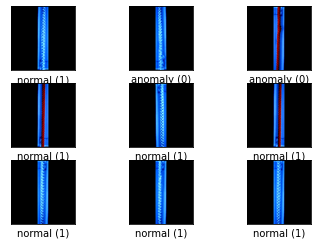

In [15]:
dataset.display_samples(dataset.VAL)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


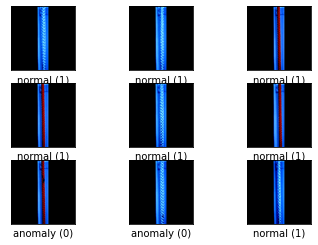

In [16]:
dataset.display_samples(dataset.TEST)

In [3]:
# create network, modify, and set parameters
net = Net(dataset)
net.build()
net.set_params()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [5]:
if not os.path.exists(cfg.MODEL.DIR):
    os.makedirs(cfg.MODEL.DIR)

if cfg.MODEL.CONTINUE_TRAINING and os.path.exists(cfg.MODEL.FILENAME):
    net.model = torch.load(cfg.MODEL.FILENAME)

<All keys matched successfully>

In [11]:
net, history = train(net, dataset)

Starting Training from Scratch.

Epoch: 0	100.00% complete. 5.77 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.4400 	Validation Loss: 0.4295
		Training Accuracy: 81.02%	 Validation Accuracy: 94.37%

Best epoch: 0 with loss: 0.43 and acc: 94.37%
6.85 total seconds elapsed. 6.85 seconds per epoch.


In [ ]:
# save history
history.to_pickle(cfg.MODEL.HISTORY_PATH)

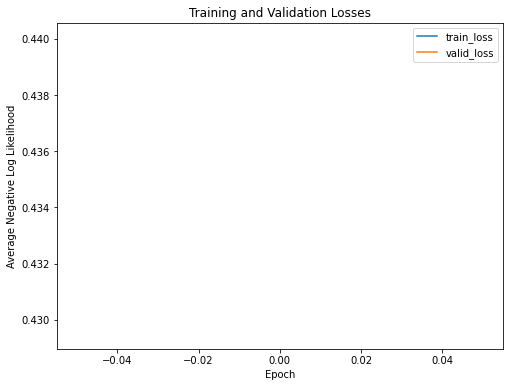

In [12]:
plot_loss(history)

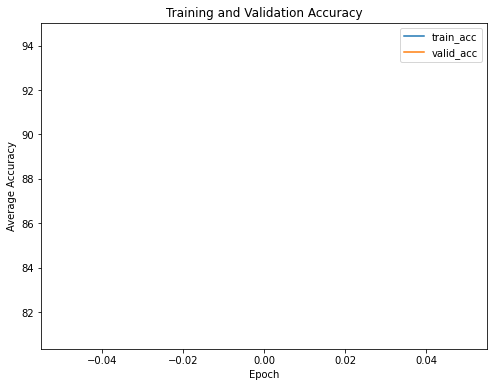

In [13]:
plot_accuracy(history)